In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv("C:/Users/Jayesh Aher/Machine learning mini projects/mini projects/house-prices-advanced-regression-techniques/train.csv")
df_test=pd.read_csv("C:/Users/Jayesh Aher/Machine learning mini projects/mini projects/house-prices-advanced-regression-techniques/test.csv")
#df_train.head()
#df_test.head()
#df_train.columns

In [3]:
df_train.columns
df_test.columns
for i in df_train.columns:
    if i not in df_test.columns:
        print(i)

SalePrice


#### df_train.shape = (1460, 81)
#### df_test.shape = (1459, 80)
##### Saleprice is a target variable

### separating numerical and catagorical cols

In [4]:
numerical_cols_train=df_train.select_dtypes(include=[np.number])        # 38 cols
categorical_cols_train=df_train.select_dtypes(exclude=[np.number])      # 43 cols
numerical_cols_test=df_test.select_dtypes(include=[np.number])          #37 cols
categorical_cols_test=df_test.select_dtypes(exclude=[np.number])        #43 cols

In [5]:
#numerical_cols_train

In [6]:
list1=['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition'] #list of features in which NA is considered as missing value(it is from discription)
#len(list1)

In [7]:
list3=list1+list(numerical_cols_train)
# dictionary that considers NA values as actual missing value
dictionary=dict.fromkeys(list3,["NA",""])    #here list3 includes list of columns in which ["NA",""](NA,space) is consider as missing value
#dictionary

In [8]:
# read data once again in which include column that have to cosider actual missing values
df_train=pd.read_csv("C:/Users/Jayesh Aher/Machine learning mini projects/mini projects/house-prices-advanced-regression-techniques/train.csv",keep_default_na=False,na_values=dictionary)
df_test=pd.read_csv("C:/Users/Jayesh Aher/Machine learning mini projects/mini projects/house-prices-advanced-regression-techniques/test.csv",keep_default_na=False,na_values=dictionary)

In [9]:
# recreating numerical colss and categorical cols separately for new revised dataset
numerical_cols_train_new=list(df_train.select_dtypes(include=[np.number]).columns)        # 38 cols
categorical_cols_train_new=list(df_train.select_dtypes(exclude=[np.number]).columns)      # 43 cols
numerical_cols_test_new=list(df_test.select_dtypes(include=[np.number]).columns)          #37 cols
categorical_cols_test_new=list(df_test.select_dtypes(exclude=[np.number]).columns)        #43 cols

In [10]:
# removing target from numeric data so that columns becomes 37 and it should not create difficulty while simple imputer fitting
numerical_cols_train_new.remove("SalePrice")


In [11]:
len(numerical_cols_train_new)

37

In [12]:
# missing value calculation
#df_train[numerical_cols_test_new].isnull().sum()[df_train[numerical_cols_test_new].isnull().sum()>0] # 3 cols
df_train[categorical_cols_test_new].isnull().sum()[df_train[categorical_cols_test_new].isnull().sum()>0]  #2 cols
#df_test[numerical_cols_test_new].isnull().sum()[df_test[numerical_cols_test_new].isnull().sum()>0] #11 cols

#df_test[categorical_cols_test_new].isnull().sum()[df_test[categorical_cols_test_new].isnull().sum()>0]  #8 cols

MasVnrType    8
Electrical    1
dtype: int64

## Simple Imputer (filling missing values)

In [13]:
from sklearn.impute import SimpleImputer
numeric_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
numeric_imputer.fit(df_train[numerical_cols_train_new]) #here all numeric columns have NA as missing value
cat_imputer.fit(df_train[list1])

SimpleImputer(strategy='most_frequent')

In [14]:
df_train[numerical_cols_train_new]=numeric_imputer.transform(df_train[numerical_cols_train_new])  #filling all the columns in numerical_cols_train_new with median
df_test[numerical_cols_test_new]=numeric_imputer.transform(df_test[numerical_cols_test_new])  #filling all the columns innumerical_cols_test_new with median
df_train[list1]=cat_imputer.transform(df_train[list1])  #filling all the columns in df_train_new[list1] with mode
df_test[list1]=cat_imputer.transform(df_test[list1])  #filling all the columns in df_test_new[list1] with mode
# note-here we are taking particular cols from list 1 bcz if we consider all catagorical cols it will consider all columns having "NA" so it will fill in all columns.but that is not the case bcz in some columns "NA" is valid category
# fitting data should contain same columns as transforming data

### no any missing value in data

In [15]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

In [16]:
df_test.isnull().sum()[df_test.isnull().sum()>0]

Series([], dtype: int64)

# removing unnecessary columns

In [17]:
# df_train.shape    #(1460,81)
# df_train.columns
#df_train.drop(columns="SalePrice",axis=1).shape

# correlation(visulisation by heatmap)

In [18]:
# plt.figure(figsize=(12,10))
# cor=df_train.corr()
# sns.heatmap(cor)
# plt.show()

In [19]:
#df_train.corr()  #it gives correlation of each column with each column

In [20]:
# df_train.corr()["SalePrice"] # it gives correlation of saleprice with each column
# df_train.corr()[(df_train.corr()["SalePrice"]>-0.035)&(df_train.corr()["SalePrice"]<0.035)]["SalePrice"]  #we remove this columns bcz they have very low correlation with target "saleprice" for that we choose correlation for columns to be removed as -0.035to 0.035

In [21]:
#remove_cols=list(df_train.corr()[(df_train.corr()["SalePrice"]>-0.035)&(df_train.corr()["SalePrice"]<0.035)]["SalePrice"].index) #list of cols to be removed from df_train and we make X_train by removing this cols along with saleprice(target)

In [22]:
#remove_cols.append("SalePrice")

In [23]:
#remove_cols

In [24]:
# X_train=df_train.drop(columns=remove_cols,axis=1)  #((1460, 74))
# y_train=df_train["SalePrice"]       
# X_test=df_test.drop(columns=['Id',
#  'BsmtFinSF2',
#  'LowQualFinSF',
#  'BsmtHalfBath',
#  'MiscVal',
#  'YrSold'],axis=1) #here as saleprice is not here so we will remove from remove_cols #(1459, 74)

In [25]:
df_train.shape,df_test.shape

((1460, 81), (1459, 80))

# one hot encoding

### processing for training data

In [26]:
# checks how many categories each column have
for i in df_train[categorical_cols_train_new].columns:
    print(i,":",df_train[i].nunique(),"labels")

MSZoning : 5 labels
Street : 2 labels
Alley : 3 labels
LotShape : 4 labels
LandContour : 4 labels
Utilities : 2 labels
LotConfig : 5 labels
LandSlope : 3 labels
Neighborhood : 25 labels
Condition1 : 9 labels
Condition2 : 8 labels
BldgType : 5 labels
HouseStyle : 8 labels
RoofStyle : 6 labels
RoofMatl : 8 labels
Exterior1st : 15 labels
Exterior2nd : 16 labels
MasVnrType : 4 labels
ExterQual : 4 labels
ExterCond : 5 labels
Foundation : 6 labels
BsmtQual : 5 labels
BsmtCond : 5 labels
BsmtExposure : 5 labels
BsmtFinType1 : 7 labels
BsmtFinType2 : 7 labels
Heating : 6 labels
HeatingQC : 5 labels
CentralAir : 2 labels
Electrical : 5 labels
KitchenQual : 4 labels
Functional : 7 labels
FireplaceQu : 6 labels
GarageType : 7 labels
GarageFinish : 4 labels
GarageQual : 6 labels
GarageCond : 6 labels
PavedDrive : 3 labels
PoolQC : 4 labels
Fence : 5 labels
MiscFeature : 5 labels
SaleType : 9 labels
SaleCondition : 6 labels


In [27]:
# knowing number of total features
digit=0
for i in df_train[categorical_cols_train_new].columns:
    digit=digit+df_train[i].nunique()
print(digit)

266


In [28]:
#knowing each category and its count in each column
for i in df_train[categorical_cols_train_new].columns:
    print(df_train[i].value_counts())
#print(lis)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Nei

In [29]:
#making list such  that feature having count>15 
lis=[]
for i in df_train[categorical_cols_train_new].columns:
    lis.append(list(df_train[i].value_counts()[df_train[i].value_counts()>15].index))
#print(lis)
#apply function that keeps name of features having count>15 as it is and other features stored in others
for i in range(len(df_train[categorical_cols_train_new].columns)):
      df_train[df_train[categorical_cols_train_new].columns[i]]=df_train[df_train[categorical_cols_train_new].columns[i]].apply(lambda x:x if x in lis[i] else "other")
#(df_train[df_train[categorical_cols_train_new].columns[5]]=="other").sum()
df_train[categorical_cols_train_new][df_train[categorical_cols_train_new]["MSZoning"]=="other"].shape

(10, 43)

In [30]:
# knowing number of total features again
digit=0
for i in df_train[categorical_cols_train_new].columns:
    digit=digit+df_train[i].nunique()
print(digit)          #OHE will create 211 new cols

211


### processing for test data

In [31]:
for i in df_test[categorical_cols_test_new].columns:
    print(i,":",df_test[i].nunique(),"labels")

MSZoning : 5 labels
Street : 2 labels
Alley : 3 labels
LotShape : 4 labels
LandContour : 4 labels
Utilities : 1 labels
LotConfig : 5 labels
LandSlope : 3 labels
Neighborhood : 25 labels
Condition1 : 9 labels
Condition2 : 5 labels
BldgType : 5 labels
HouseStyle : 7 labels
RoofStyle : 6 labels
RoofMatl : 4 labels
Exterior1st : 13 labels
Exterior2nd : 15 labels
MasVnrType : 4 labels
ExterQual : 4 labels
ExterCond : 5 labels
Foundation : 6 labels
BsmtQual : 5 labels
BsmtCond : 5 labels
BsmtExposure : 5 labels
BsmtFinType1 : 7 labels
BsmtFinType2 : 7 labels
Heating : 4 labels
HeatingQC : 5 labels
CentralAir : 2 labels
Electrical : 4 labels
KitchenQual : 4 labels
Functional : 7 labels
FireplaceQu : 6 labels
GarageType : 7 labels
GarageFinish : 4 labels
GarageQual : 5 labels
GarageCond : 6 labels
PavedDrive : 3 labels
PoolQC : 3 labels
Fence : 5 labels
MiscFeature : 4 labels
SaleType : 9 labels
SaleCondition : 6 labels


In [32]:
# knowing number of total features
digit=0
for i in df_test[categorical_cols_test_new].columns:
    digit=digit+df_test[i].nunique()
print(digit)

248


In [33]:
#knowing each category and its count in each column
for i in df_test[categorical_cols_test_new].columns:
    print(df_test[i].value_counts())

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64
Pave    1453
Grvl       6
Name: Street, dtype: int64
NA      1352
Grvl      70
Pave      37
Name: Alley, dtype: int64
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64
AllPub    1459
Name: Utilities, dtype: int64
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64
Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtyp

In [34]:
#making list such  that feature having count>15 
lis1=[]
for j in df_test[categorical_cols_test_new].columns:
    lis1.append(list(df_test[j].value_counts()[df_test[j].value_counts()>15].index))
#print(lis1)
#apply function that keeps name of features having count>15 as it is and other features stored in others
for j in range(len(df_test[categorical_cols_test_new].columns)):
       df_test[df_test[categorical_cols_test_new].columns[j]]=df_test[df_test[categorical_cols_test_new].columns[j]].apply(lambda x:x if x in lis1[j] else "other")
(df_test[df_test[categorical_cols_test_new].columns[6]]=="other").sum()
#df_test[categorical_cols_test_new][df_test[categorical_cols_test_new]["MSZoning"]=="other"]

10

In [35]:
# knowing number of total features again
digit=0
for i in df_test[categorical_cols_test_new].columns:
    digit=digit+df_test[i].nunique()
print(digit)          #OHE will create 210 new cols in test data

210


# ONE HOT ENCODING

In [36]:
from sklearn.preprocessing import OneHotEncoder
OHE=OneHotEncoder(handle_unknown="ignore")
OHE.fit(df_train[categorical_cols_train_new])
A=OHE.transform(df_train[categorical_cols_train_new]).toarray()
B=OHE.transform(df_test[categorical_cols_test_new]).toarray()
OHE.get_feature_names()
#len(OHE.get_feature_names())=211 # it creates 211 new cols
#A.shape=(1460,211)
#B.shape=(1459,211) df_test[categorical_cols_test_new] contains 210 cols and df_train[categorical_cols_train_new] contains 211 cols one column is automatically created by "handle unknown=true"

C:\Users\Jayesh Aher\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_FV', 'x0_RH', 'x0_RL', 'x0_RM', 'x0_other', 'x1_Pave',
       'x1_other', 'x2_Grvl', 'x2_NA', 'x2_Pave', 'x3_IR1', 'x3_IR2',
       'x3_Reg', 'x3_other', 'x4_Bnk', 'x4_HLS', 'x4_Low', 'x4_Lvl',
       'x5_AllPub', 'x5_other', 'x6_Corner', 'x6_CulDSac', 'x6_FR2',
       'x6_Inside', 'x6_other', 'x7_Gtl', 'x7_Mod', 'x7_other',
       'x8_Blmngtn', 'x8_BrDale', 'x8_BrkSide', 'x8_ClearCr',
       'x8_CollgCr', 'x8_Crawfor', 'x8_Edwards', 'x8_Gilbert',
       'x8_IDOTRR', 'x8_MeadowV', 'x8_Mitchel', 'x8_NAmes', 'x8_NWAmes',
       'x8_NoRidge', 'x8_NridgHt', 'x8_OldTown', 'x8_SWISU', 'x8_Sawyer',
       'x8_SawyerW', 'x8_Somerst', 'x8_StoneBr', 'x8_Timber', 'x8_other',
       'x9_Artery', 'x9_Feedr', 'x9_Norm', 'x9_PosN', 'x9_RRAn',
       'x9_other', 'x10_Norm', 'x10_other', 'x11_1Fam', 'x11_2fmCon',
       'x11_Duplex', 'x11_Twnhs', 'x11_TwnhsE', 'x12_1.5Fin',
       'x12_1Story', 'x12_2Story', 'x12_SFoyer', 'x12_SLvl', 'x12_other',
       'x13_Gable', 'x13_Hip', 'x13_other', '

In [37]:
C=pd.DataFrame(data=A,columns=OHE.get_feature_names())  
D=pd.DataFrame(data=B,columns=OHE.get_feature_names())

C:\Users\Jayesh Aher\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
df_train.drop(columns=categorical_cols_train_new,axis=1,inplace=True)  #initially(1460,81) & after dropping(1460,38)   len(categorical_cols_train_new)=43
df_test.drop(columns=categorical_cols_test_new,axis=1,inplace=True)    #initially(1460,80) & after dropping(1459,37)   len(categorical_cols_test_new)=43

### concatenating dataframes and make it for model training

In [39]:
df_train=pd.concat([df_train,C],join="inner",axis=1)
df_test=pd.concat([df_test,D],join="inner",axis=1)

In [40]:
#df_train.shape=(1460, 249) 
#df_test.shape=(1459, 248)

# finding correlation with target variable

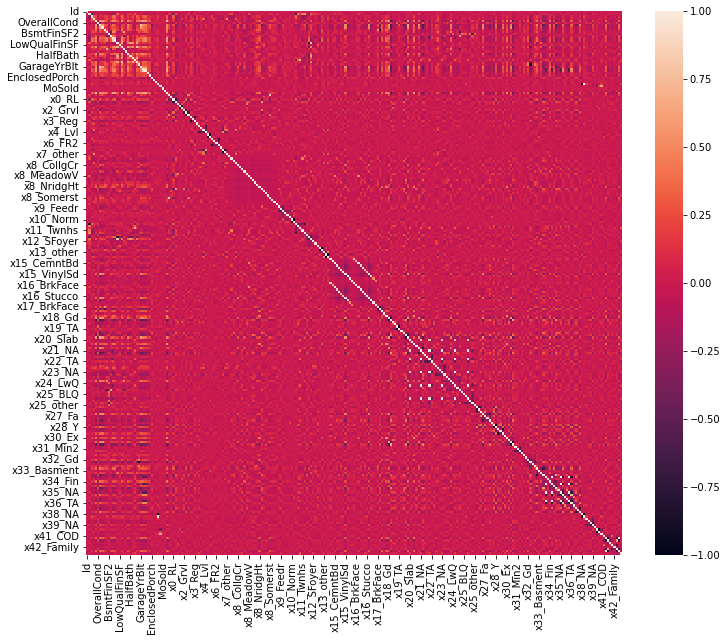

In [41]:
# plotting heatmap
plt.figure(figsize=(12,10))
cor=df_train.corr()
sns.heatmap(cor)
plt.show()

In [42]:
cor["SalePrice"]  #as it contains 249 cols therefor corr. matrix is of shape(249*249) here cor=df_train.corr()

Id            -0.021917
MSSubClass    -0.084284
LotFrontage    0.334771
LotArea        0.263843
OverallQual    0.790982
                 ...   
x42_Abnorml   -0.118069
x42_Family    -0.046480
x42_Normal    -0.153990
x42_Partial    0.352060
x42_other     -0.038912
Name: SalePrice, Length: 249, dtype: float64

In [43]:
#cor[(cor["SalePrice"]>-0.03) & (cor["SalePrice"]<0.03)]["SalePrice"]  we will remove this cols(36 cols)from training and testing also
#no.of cols in df_train=249-36=213       no.of cols in df_test=248-36=212
remove_noncorr_cols_to_target=list(cor[(cor["SalePrice"]>-0.03) & (cor["SalePrice"]<0.03)]["SalePrice"].index)
#len(remove_noncorr_cols_to_target)=36   

In [44]:
df_train.drop(columns=remove_noncorr_cols_to_target,axis=1,inplace=True)
df_test.drop(columns=remove_noncorr_cols_to_target,axis=1,inplace=True)

In [45]:
df_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,x40_NA,x40_Shed,x41_COD,x41_New,x41_WD,x42_Abnorml,x42_Family,x42_Normal,x42_Partial,x42_other
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,150.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,284.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,434.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,540.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,490.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,953.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,589.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,877.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## making training and testing data

In [49]:
X_train=df_train.drop(columns="SalePrice",axis=1) #(1460,212 )
y_train=df_train["SalePrice"]
X_test=df_test   #(1459,212)

In [56]:
X_train


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,x40_NA,x40_Shed,x41_COD,x41_New,x41_WD,x42_Abnorml,x42_Family,x42_Normal,x42_Partial,x42_other
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,150.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,284.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,434.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,540.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,490.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,953.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,589.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,877.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### finding correlation between X_train

In [54]:
X_train.corr()  #212x212 matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,x40_NA,x40_Shed,x41_COD,x41_New,x41_WD,x42_Abnorml,x42_Family,x42_Normal,x42_Partial,x42_other
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.140759,...,0.041835,-0.054229,-0.034162,-0.045156,0.026359,0.005003,0.000983,0.024359,-0.051068,0.034173
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.124098,...,-0.006487,0.007026,-0.014744,0.128995,-0.091864,-0.021725,0.016250,-0.074146,0.127293,-0.034006
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,-0.002618,...,-0.108671,0.108728,-0.016019,0.020039,-0.002292,-0.029126,-0.010781,0.005711,0.022635,0.001144
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,0.308159,...,0.095455,-0.090410,-0.065259,0.327412,-0.225013,-0.103535,-0.025515,-0.143282,0.323295,-0.059907
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,-0.136841,...,-0.074813,0.071139,-0.028186,-0.156175,0.163684,-0.046367,-0.023873,0.161642,-0.151659,-0.048528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x42_Abnorml,0.005003,-0.021725,-0.029126,-0.103535,-0.046367,-0.110233,-0.135942,-0.043861,-0.024832,-0.023821,...,0.010521,-0.005841,0.335665,-0.082320,-0.140646,1.000000,-0.032128,-0.582947,-0.083419,-0.028696
x42_Family,0.000983,0.016250,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,0.000765,0.021534,...,0.023096,-0.021962,-0.020530,-0.035587,0.028599,-0.032128,1.000000,-0.252006,-0.036062,-0.012405
x42_Normal,0.024359,-0.074146,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,-0.019560,-0.153930,...,-0.053818,0.047504,-0.171911,-0.645698,0.634322,-0.582947,-0.252006,1.000000,-0.654323,-0.225089
x42_Partial,-0.051068,0.127293,0.022635,0.323295,-0.151659,0.343895,0.322837,0.162205,0.044912,0.249315,...,0.059968,-0.057023,-0.053304,0.986819,-0.769559,-0.083419,-0.036062,-0.654323,1.000000,-0.032210


In [57]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [62]:
corr_features=correlation(X_train,0.85)

In [63]:
len(set(corr_features))

30

In [80]:
# highly correlated features
corr_features #we drop it from X_train and X_test shape becomes X_train.shape=212-30=182 & X_test.shape=212-30=182

{'GarageArea',
 'x10_other',
 'x13_Hip',
 'x14_other',
 'x16_CmentBd',
 'x16_HdBoard',
 'x16_MetalSd',
 'x16_VinylSd',
 'x16_Wd Sdng',
 'x18_TA',
 'x19_TA',
 'x1_other',
 'x22_NA',
 'x23_NA',
 'x24_NA',
 'x25_NA',
 'x28_Y',
 'x29_SBrkr',
 'x32_NA',
 'x34_NA',
 'x35_NA',
 'x36_NA',
 'x37_Y',
 'x38_NA',
 'x38_other',
 'x3_Reg',
 'x40_Shed',
 'x42_Partial',
 'x7_Mod',
 'x8_Somerst'}

In [77]:
X_train=X_train.drop(corr_features,axis=1) #(1460,182)
X_test=X_test.drop(corr_features,axis=1)  #(1459,182)

## scaling of features